In [1]:
%load_ext autoreload
%autoreload 2

import os, random, sys
import pathlib

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

BASE_PATH = pathlib.Path(os.getcwd()).parent.parent
print(f"os.getcwd() -> {os.getcwd()}")
print(f"pathlib.Path(os.getcwd()).parent.parent -> {BASE_PATH}")
# sys.path.insert(0, str(BASE_PATH / "ds_helper"))
sys.path.insert(0, str(BASE_PATH))


# BASE_PATH = pathlib.Path(os.getcwd()).parent
# print(f"BASE_PATH: {BASE_PATH}")
# if BASE_PATH not in sys.path:
#     sys.path.append(str(BASE_PATH))
print(f"sys.path = {sys.path}")

SEED = 41
random.seed(SEED)
np.random.seed(SEED)

%matplotlib inline

os.getcwd() -> /home/mjbhobe/code/git-projects/DataScienceWithPython/DataScienceRevealed-Nokeri/ch01
pathlib.Path(os.getcwd()).parent.parent -> /home/mjbhobe/code/git-projects/DataScienceWithPython
sys.path = ['/home/mjbhobe/code/git-projects/DataScienceWithPython', '/home/mjbhobe/code/git-projects/DataScienceWithPython/DataScienceRevealed-Nokeri/ch01', '/home/mjbhobe/code/git-projects/DataScienceWithPython/venv/lib/python39.zip', '/home/mjbhobe/code/git-projects/DataScienceWithPython/venv/lib/python3.9', '/home/mjbhobe/code/git-projects/DataScienceWithPython/venv/lib/python3.9/lib-dynload', '', '/home/mjbhobe/code/git-projects/DataScienceWithPython/venv/lib/python3.9/site-packages']


In [6]:
import ds_helpers as dsh

print(dsh.about())
print(dsh.FAV_COLORS)

Data Science Helpers by Manish Bhobé. Released by Nämostuté Ltd. with MIT Licence.
Use at your own risk. Manish Bhobé (or Nämostuté Ltd.) are not liable for any damages from use of this software!
['#64E6FF', '#007DC5', '#4D2F9E', '#BE0046', '#EB5000', '#FFE600', '#02D46A']


In [15]:
import ds_helpers as dsh


# my custom color palette
COLORS = ["#64E6FF", "#007DC5", "#4D2F9E", "#BE0046", "#EB5000", "#FFE600", "#02D46A"]
color_palette = dsh.colopal.palettes_from_colors(COLORS)

sns.set_palette(sns.color_palette(color_palette["lighter_40p"]))
print(color_palette["lighter_40p"])

['#a2f0ff', '#66b1dc', '#9482c4', '#d86690', '#f39666', '#fff066', '#67e5a5']


In [18]:
flowers = {
    "rose": 25,
    "lily": 10,
    "sunflower": 10,
    "aster": 30,
    "carnation": 12,
    "jerbera": 15,
    "dandilion": 10,
}

In [19]:
color1 = "#45ff72"
color2 = dsh.hex2rgb(color1)
color3 = dsh.rgb2hex(str(color2))
print(color2, type(color2), str(color2), color3)

rgb(69,255,114) <class 'str'> rgb(69,255,114) #45ff72


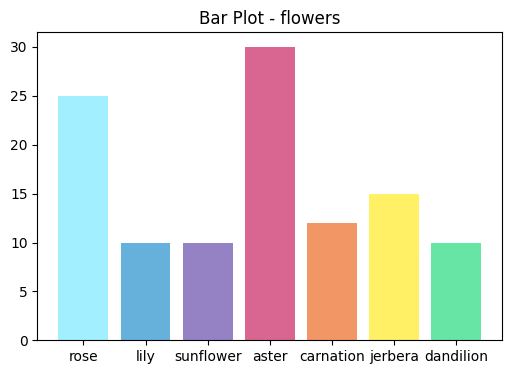

In [20]:
# bar plot of flowers
plt.figure(figsize=(6, 4))
plt.bar(
    range(len(flowers)),
    list(flowers.values()),
    tick_label=list(flowers.keys()),
    color=color_palette["lighter_40p"],
)
plt.title("Bar Plot - flowers")
plt.show()

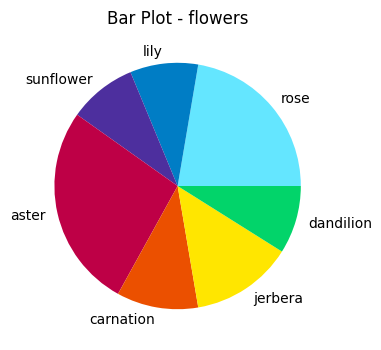

In [21]:
# pie chart of the same
plt.figure(figsize=(6, 4))
plt.pie(
    list(flowers.values()),
    labels=list(flowers.keys()),
    colors=color_palette["original"],
)
plt.title("Bar Plot - flowers")
plt.show()

In [12]:
# let's create a random set of ages (discrete numeric variables)
ages = np.random.randint(10, 100, 200)

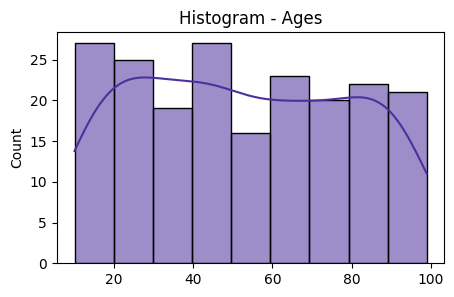

In [24]:
# create a histogram
plt.figure(figsize=(5, 3))
sns.histplot(ages, color=COLORS[2], alpha=0.55, binwidth=10, kde=True)
plt.title("Histogram - Ages")
plt.show()

In [25]:
SAMPLE_SIZE = 50
SAMPLE = np.random.randint(10, 100, SAMPLE_SIZE)
SAMPLE[:20]

array([87, 86, 65, 11, 62, 65, 60, 58, 87, 70, 91, 69, 17, 63, 98, 11, 53,
       86, 50, 43])

In [26]:
mean = np.mean(SAMPLE)  # using Numpy
# and this is how it's really calculated
mean1 = np.sum(SAMPLE) / SAMPLE_SIZE
print(f"Means: {mean:.3f} & {mean1:.3f}")

Means: 53.900 & 53.900


In [27]:
mean3 = (np.sum(SAMPLE) + 550) / (SAMPLE_SIZE + 1)
print(f"New mean: {mean3:.3f}")

New mean: 63.627


## Simple Linear Regression

### 1. Step 1: Load the data

In [2]:
%load_ext autoreload
%autoreload 2

import os, random, sys
import pathlib

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

BASE_PATH = pathlib.Path(os.getcwd()).parent.parent
# print(f"os.getcwd() -> {os.getcwd()}")
# print(f"pathlib.Path(os.getcwd()).parent.parent -> {BASE_PATH}")
# sys.path.insert(0, str(BASE_PATH / "ds_helper"))
sys.path.insert(0, str(BASE_PATH))


# BASE_PATH = pathlib.Path(os.getcwd()).parent
# print(f"BASE_PATH: {BASE_PATH}")
# if BASE_PATH not in sys.path:
#     sys.path.append(str(BASE_PATH))
# print(f"sys.path = {sys.path}")

SEED = 41
random.seed(SEED)
np.random.seed(SEED)

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import ds_helpers as dsh

# my custom color palette
# COLORS = ["#64E6FF", "#007DC5", "#4D2F9E", "#BE0046", "#EB5000", "#FFE600", "#02D46A"]
COLORS = dsh.FAV_COLORS  # same as above
color_palette = dsh.colopal.palettes_from_colors(COLORS)

# sns.set_palette(sns.color_palette(color_palette["lighter_40p"]))
# print(color_palette["lighter_40p"])

In [6]:
DATA_FILE_PATH = (
    pathlib.Path(os.getcwd()).parent / "data" / "kaggle" / "Salary_Data.csv"
)
assert os.path.exists(DATA_FILE_PATH), f"FATAL: {DATA_FILE_PATH} does not exist!"

In [8]:
# load data into a pandas dataframe
df = pd.read_csv(DATA_FILE_PATH)
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### 2. Step 2 - check if we have any missing values

In [9]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

/tmp/ipykernel_7467/3203404255.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Salary"], hist_kws=dict(edgecolor="steelblue"), color=COLORS[2])


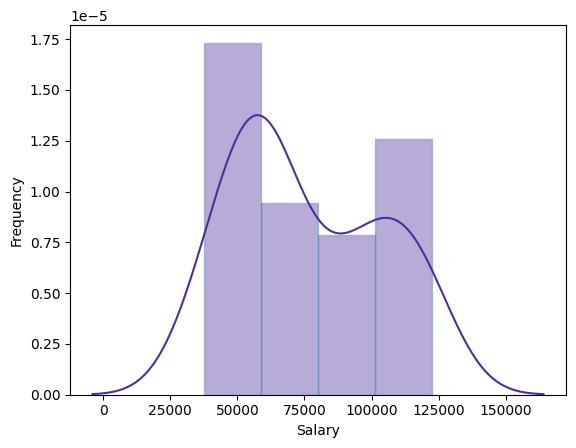

In [13]:
# plot histogram of salary
sns.distplot(df["Salary"], hist_kws=dict(edgecolor="steelblue"), color=COLORS[2])
plt.ylabel("Frequency")
plt.xlabel("Salary")
plt.show()

<Axes: xlabel='Salary', ylabel='Count'>

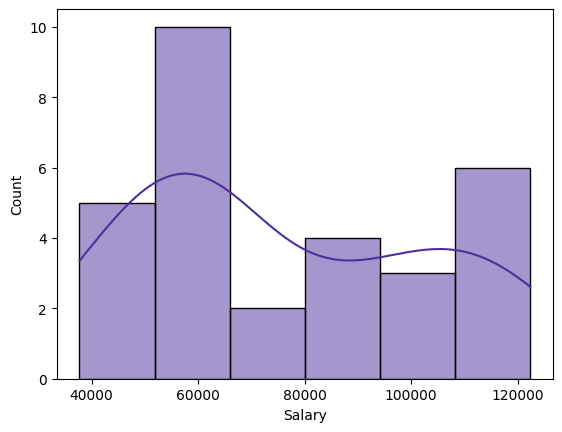

In [15]:
sns.histplot(data=df, x=df["Salary"], color=COLORS[2], kde=True)

In [21]:
sal = df["Salary"]
mean, median, stdev, skew, kurtosis = (
    np.mean(sal),
    np.median(sal),
    np.std(sal),
    stats.skew(sal),
    stats.kurtosis(sal),
)
print(
    f"Salary metrics -> mean: {mean:.2f} - median: {median:.2f} - stdev: {stdev:.2f} - skew: {skew:.2f} - kurtosis: {kurtosis:.2f}"
)

Salary metrics -> mean: 76003.00 - median: 65237.00 - stdev: 26953.65 - skew: 0.34 - kurtosis: -1.28


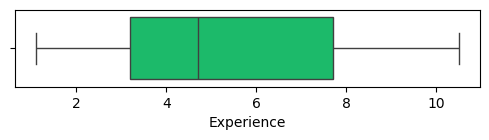

In [33]:
# detect outliers using boxplot
plt.figure(figsize=(6, 1))
sns.boxplot(df["YearsExperience"], orient="h", color=COLORS[-1])
plt.xlabel("Experience")
plt.show()

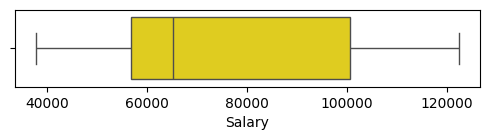

In [34]:
# detect outliers using boxplot
plt.figure(figsize=(6, 1))
sns.boxplot(df["Salary"], orient="h", color=COLORS[-2])
plt.xlabel("Salary")
plt.show()

In [35]:
df.loc[df.Salary > 120000]

,YearsExperience,Salary
28,10.3,122391.0
29,10.5,121872.0


In [36]:
# Old Salary = 122391.0
df.loc[df.YearsExperience == 10.3, "Salary"] = 500000

In [37]:
df.loc[df.Salary > 120000]

,YearsExperience,Salary
28,10.3,500000.0
29,10.5,121872.0


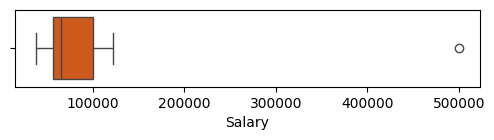

In [38]:
# detect outliers using boxplot
plt.figure(figsize=(6, 1))
sns.boxplot(df["Salary"], orient="h", color=COLORS[-3])
plt.xlabel("Salary")
plt.show()

In [39]:
# restore old salary
df.loc[df.YearsExperience == 10.3, "Salary"] = 122391.0

In [40]:
df.loc[df.Salary > 120000]

,YearsExperience,Salary
28,10.3,122391.0
29,10.5,121872.0


<Axes: xlabel='YearsExperience', ylabel='Salary'>

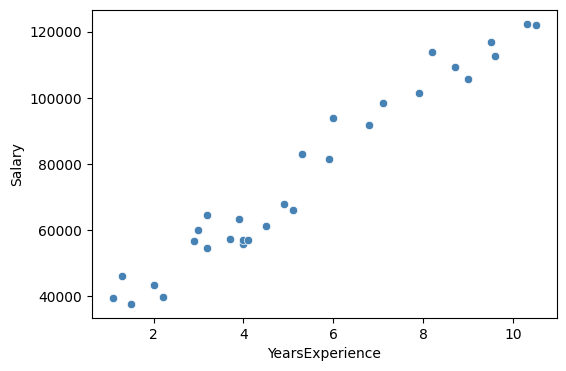

In [42]:
# scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(df, x="YearsExperience", y="Salary", color="steelblue")

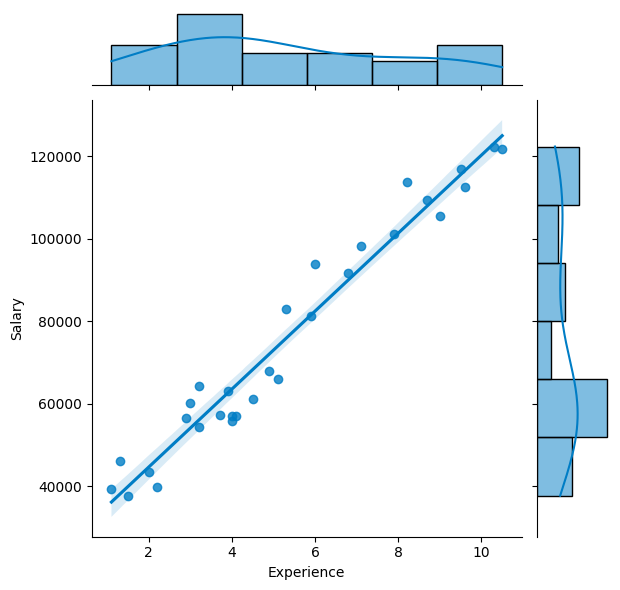

In [44]:
sns.jointplot(x="YearsExperience", y="Salary", data=df, kind="reg", color=COLORS[1])
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()